In [27]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [28]:
#Image
img=cv.imread("input/me.jpg")

In [29]:
# a.Cropped Image
h,w,c=img.shape
ch=int(h//2)
cw=int(w//2)
cropped_img=img[ch-100:ch+100,cw-100:cw+100,:]
cv.imshow("Cropped Image",cropped_img)
cv.imwrite("output/cropped_img.png",cropped_img)


# b.Red Channel
b,g,r=cv.split(img)
cv.imshow("Red Channel Image",r)
cv.imwrite("output/red_channel_img.png",r)

# c.Gray Scale
gray_image=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow("GrayScale Image",gray_image)
cv.imwrite("output/GrayScale_Image.png",gray_image)

#With Ready Functions of OpenCV
# Sobel Filters
# sobelx = cv.Sobel(gray_image,cv.CV_8U,1,0,ksize=3)
# sobely = cv.Sobel(gray_image,cv.CV_8U,0,1,ksize=3)
# cv.imshow("Sobel X",sobelx)
# cv.imshow("Sobel Y",sobely)

# gradient_magnitude=np.hypot(sobelx,sobely)
# plt.imshow(gradient_magnitude.astype('int'),cmap='gray')

cv.waitKey(0)


-1

-1

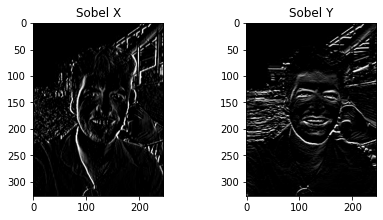

In [30]:
from pickletools import uint8
import numpy as np
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])


sobel_x= cv.filter2D(gray_image,-1,filter)
sobel_y= cv.filter2D(gray_image,-1,filter.T)

fig = plt.figure(figsize=(7, 7))
# Adds a subplot at the 1st position
fig.add_subplot(2, 2, 1)
  
# showing image
plt.imshow(sobel_x.astype('int'),cmap='gray')

plt.title("Sobel X")
cv.imwrite("output/sobelx.png",sobel_x)
# Adds a subplot at the 2nd position
fig.add_subplot(2, 2, 2)
  
# showing image
plt.imshow(sobel_y.astype('int'),cmap='gray')
cv.imwrite("output/sobely.png",sobel_y)
plt.title("Sobel Y")



cv.imshow("Sobel X",sobel_x)
cv.imshow("Sobel Y",sobel_y)

cv.waitKey(0)

True

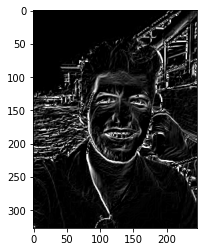

In [31]:

gradient_magnitude=np.uint8(np.hypot(sobel_x,sobel_y))

plt.imshow(gradient_magnitude,cmap='gray')

cv.imwrite("output/gradient_mag.png",gradient_magnitude)


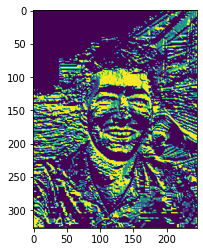

In [32]:
orientation=np.uint8(np.arctan2(sobel_y,sobel_x)*(180/np.pi)%180)
plt.imshow(orientation)

In [33]:
gaussian_blur=cv.GaussianBlur(img,(3,3),sigmaX=10,sigmaY=10)
src_gray = cv.cvtColor(gaussian_blur, cv.COLOR_BGR2GRAY)
LoG=cv.Laplacian(src_gray,cv.CV_16S,ksize=3)
abs_dst = cv.convertScaleAbs(LoG)
cv.imshow("Log",abs_dst)
cv.imwrite("output/abs_dst.png",abs_dst)



gaussian_blur1=cv.GaussianBlur(img,(5,5),sigmaX=50,sigmaY=50)
src_gray1 = cv.cvtColor(gaussian_blur1, cv.COLOR_BGR2GRAY)
LoG1=cv.Laplacian(src_gray1,cv.CV_16S,ksize=3)
abs_dst1 = cv.convertScaleAbs(LoG1)
cv.imshow("Log2",abs_dst1)
cv.imwrite("output/abs_dst1.png",abs_dst1)
cv.waitKey(0)


-1

## Problem 2: (Basic video operations)

In [34]:
import cv2 as cv
import time
import numpy as np
vid = cv.VideoCapture(0)
# used to record the time when we processed last frame


while(True):
      
 
    ret, frame = vid.read()
   
    fps=vid.get(cv.CAP_PROP_FPS)
    
    cv.imshow('frame', frame)
    gray_frame=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    sobel_frame_x= np.uint8(cv.filter2D(gray_frame,-1,filter))
    sobel_frame_y= np.uint8(cv.filter2D(gray_frame,-1,filter.T))
    # font which we will be using to display FPS
    font = cv.FONT_HERSHEY_SIMPLEX
    # time when we finish processing for this frame
    cv.putText(sobel_frame_x, str(fps), (7, 70), font, 3, (100, 255, 0), 3, cv.LINE_AA)
    cv.putText(sobel_frame_y, str(fps), (7, 70), font, 3, (100, 255, 0), 3, cv.LINE_AA)
   
    cv.imshow("Sobel X",sobel_frame_x)
    cv.imshow("Sobel Y",sobel_frame_y)
 
    # putting the FPS count on the frame
    cv.putText(gray_frame, str(fps), (7, 70), font, 3, (100, 255, 0), 3, cv.LINE_AA)
    # displaying the frame with fps
   
 
    gradient_magnitude=np.uint8(np.hypot(sobel_frame_x,sobel_frame_y))

    print(gradient_magnitude)
    cv.imshow("gradient frame magnitude",gradient_magnitude)

     
    
   
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv.destroyAllWindows()

[[0 2 2 ... 0 0 0]
 [0 3 2 ... 0 0 0]
 [0 4 1 ... 0 0 0]
 ...
 [8 9 4 ... 0 0 0]
 [4 4 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 ...
 [0 2 3 ... 0 0 0]
 [0 4 5 ... 0 0 0]
 [0 4 6 ... 0 0 0]]
[[ 0  0  0 ...  0  0  0]
 [ 6  8 11 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  4  4 ...  0  0  0]
 [ 0  4  5 ...  0  0  0]
 [ 0  4  4 ...  0  0  0]]
[[ 0  0  0 ...  4  4  0]
 [ 0  0  3 ...  4  4  0]
 [ 4  7 10 ...  3  4  0]
 ...
 [10  6  0 ...  0  0  0]
 [ 8  6  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 3 4 ... 0 0 0]
 ...
 [2 4 4 ... 0 0 0]
 [8 8 8 ... 0 0 0]
 [0 4 2 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 3 7 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 1 7 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 [0 4 4 ... 0 0 0]]
[[ 0 12  0 ...  0  0  0]
 [ 4 11  1 ...  0  0  0]
 [ 6  8  2 ...  0  0  0]
 ...
 [12 12  8 ...  0  0  0]
 [ 0  3  1 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]]
[[0 4 8 ... 0 0 0]
 [0 4 8 ... 0 0 0]
 [4 5 7 ... 0 

In [35]:
import numpy as np
import cv2 as cv
vid = cv.VideoCapture(0)
w=int(vid.get(3))
h=int(vid.get(4))

# I already recorded a video so that I commented of recording part.

#fourcc = cv.VideoWriter_fourcc(*'XVID')
#out = cv.VideoWriter('output/output.avi', fourcc, 20.0,(w*2,h))


while(True):
      
 
    ret, frame = vid.read()
   
    fps=vid.get(cv.CAP_PROP_FPS)
    
# Make the grey scale image have three channels

    
    gray_frame=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    

    filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    sobel_frame_x= np.uint8(cv.filter2D(gray_frame,-1,filter))
    sobel_frame_y= np.uint8(cv.filter2D(gray_frame,-1,filter.T))
    # font which we will be using to display FPS
    
 
    gradient_magnitude=np.uint8(np.hypot(sobel_frame_x,sobel_frame_y))

    gradient_magnitude=cv.cvtColor(gradient_magnitude,cv.COLOR_GRAY2BGR)
    numpy_horizontal_concat = np.concatenate((frame,gradient_magnitude), axis=1)
    numpy_horizontal_concat=cv.flip(numpy_horizontal_concat,1)
    #out.write(numpy_horizontal_concat)


    cv.imshow('Horizontal', numpy_horizontal_concat)
     
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
#out.release()
# Destroy all the windows
cv.destroyAllWindows()